In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from sklearn.metrics import adjusted_rand_score

from utils.EvaluationUtilities import rmse



from models.PriorParameters import GMMPriorParameters
from models.PriorParameters import BMMPriorParameters
from models.GMMGibbs import GMMGibbs
from models.BMMGibbs import BMMGibbs
from models.GMMVBEM import GMMVBEM
from models.BMMVBEM import BMMVBEM
from models.BMMEM import BMMEM
from models.GMMEM import GMMEM

from utils.ArbitraryImputer import mean_impute, median_impute, mode_impute
from utils.EvaluationUtilities import rmse, multi_restart, run_full_evaluation, get_full_results

from datasets.Dataset import Dataset

# BMM Shapes

In [2]:
def paint_shape(X, title):
    figure = plt.figure(figsize=(7, 7))
    rows, cols = 1, 3


    for k in range(3):
        img = np.round(X[k, :]).reshape(10, 10)
        ax = figure.add_subplot(rows, cols, k + 1)
        ax.set_title(f"Image {k}")
        ax.axis("off")
        ax.imshow(img, cmap="gray")

    plt.tight_layout()
    figure.suptitle(title, fontsize=16,y=0.73)
    plt.show()

In [3]:
import matplotlib.pyplot as plt

def paint_shapes(X, titles):
    figure, axes = plt.subplots(nrows=6, ncols=3, figsize=(7, 18))

    for i in range(6):       # rows (different methods)
        for k in range(3):   # cols (3 samples per method)
            img = X[i][k, :].reshape(10, 10)
            ax = axes[i, k]
            ax.imshow(img, cmap="gray")
            ax.axis("off")

            # Only label the center column with the method name
            if k == 1:
                ax.set_title(titles[i], fontsize=15)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, top=0.85)  # smaller value = less vertical space
    # plt.subplots_adjust(top=0.95)  # reserve space for suptitle if needed
    # figure.suptitle("Shape Reconstruction Comparisons", fontsize=16, y=1.02)
    plt.show()


In [5]:
shapes_dirpath = "./../Datasets/Bernoulli/Processed/shapes/"

X_train_shapes = np.load(shapes_dirpath + "X_train_shapes.npy")
y_train_shapes = np.load(shapes_dirpath + "y_train_shapes.npy")
means_shapes = np.load(shapes_dirpath + "means_shapes.npy")
pis_shapes = np.load(shapes_dirpath + "pis_shapes.npy")
shape_dataset = Dataset(X_train_shapes, y_train_shapes)
shape_mean_dataset = Dataset(means_shapes, y_train_shapes)

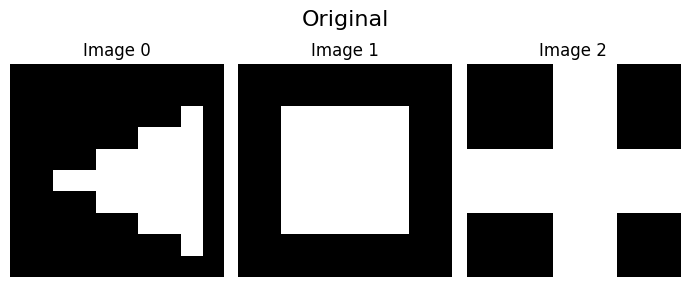

In [5]:
paint_shape(means_shapes, "Original")

In [31]:
X_train_shapes_missing_30 = shape_dataset.apply_missingness(0.3)[0]
mean_shapes_missing_30 = shape_mean_dataset.apply_missingness(0.3)[0]

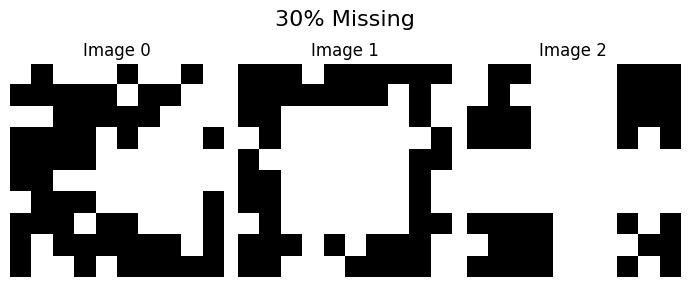

In [131]:
paint_shape(mean_shapes_missing_30, "30% Missing")

In [33]:

BMM_shape_prior = BMMPriorParameters(X_train_shapes, 3)
BMM_shape_em_cc30 = BMMEM(3, complete_case=True)
BMM_shape_em30 = BMMEM(3)
BMM_shape_em_impute30 = BMMEM(3)
BMM_shape_gibbs30 = BMMGibbs(BMM_shape_prior)
BMM_shape_vbem30 = BMMVBEM(BMM_shape_prior)


res0 = BMM_shape_em_cc30.fit(X_train_shapes_missing_30)
res1 = BMM_shape_em30.fit(X_train_shapes_missing_30)
res2 = BMM_shape_em_impute30.fit(mean_impute(X_train_shapes_missing_30))
res3 = BMM_shape_gibbs30.fit(X_train_shapes_missing_30)
res4 = BMM_shape_vbem30.fit(X_train_shapes_missing_30)

In [ ]:
shape_em_result30 = BMM_shape_em30.impute(mean_shapes_missing_30)
shape_em_cc_result30 = BMM_shape_em_cc30.impute(mean_shapes_missing_30)
shapes_em_impute_result30 = BMM_shape_em_impute30.impute(mean_shapes_missing_30)
shapes_gibbs_result30 = BMM_shape_gibbs30.impute(mean_shapes_missing_30)
shapes_vbem_result30 = BMM_shape_vbem30.impute(mean_shapes_missing_30)

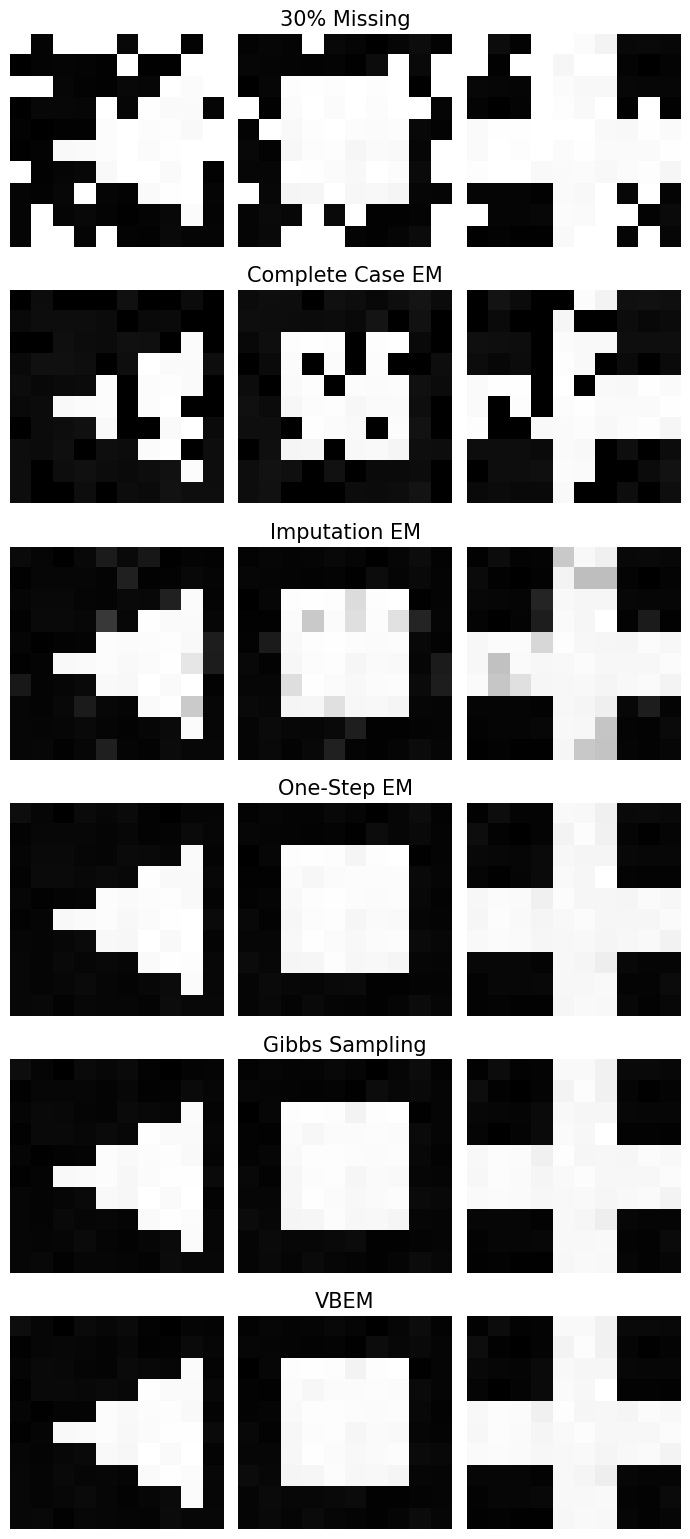

In [142]:
images_30 = [mean_shapes_missing_30, shape_em_cc_result30,shapes_em_impute_result30,shape_em_result30,shapes_gibbs_result30,shapes_vbem_result30]
titles_30 = ["30% Missing","Complete Case EM", "Imputation EM","One-Step EM","Gibbs Sampling","VBEM"]
paint_shapes(images_30, titles_30)

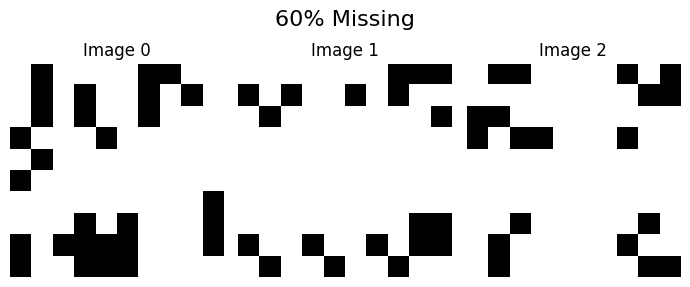

In [132]:
X_train_shapes_missing_60 = shape_dataset.apply_missingness(0.6)[0]
mean_shapes_missing_60 = shape_mean_dataset.apply_missingness(0.6)[0]
paint_shape(mean_shapes_missing_60, "60% Missing")

In [37]:

BMM_shape_prior = BMMPriorParameters(X_train_shapes, 3)
BMM_shape_em_cc60 = BMMEM(3, complete_case=True)
BMM_shape_em60 = BMMEM(3)
BMM_shape_em_impute60 = BMMEM(3)
BMM_shape_gibbs60 = BMMGibbs(BMM_shape_prior)
BMM_shape_vbem60 = BMMVBEM(BMM_shape_prior)


res0 = BMM_shape_em_cc60.fit(X_train_shapes_missing_60)
res1 = BMM_shape_em60.fit(X_train_shapes_missing_60)
res2 = BMM_shape_em_impute60.fit(mean_impute(X_train_shapes_missing_60))
res3 = BMM_shape_gibbs60.fit(X_train_shapes_missing_60)
res4 = BMM_shape_vbem60.fit(X_train_shapes_missing_60)

In [ ]:
shape_em_result60 = BMM_shape_em60.impute(mean_shapes_missing_60)
shape_em_cc_result60 = BMM_shape_em_cc60.impute(mean_shapes_missing_60)
shapes_em_impute_result60 = BMM_shape_em_impute60.impute(mean_shapes_missing_60)
shapes_gibbs_result60 = BMM_shape_gibbs60.impute(mean_shapes_missing_60)
shapes_vbem_result60 = BMM_shape_vbem60.impute(mean_shapes_missing_60)

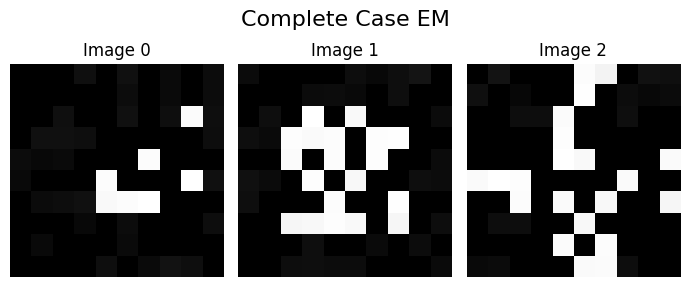

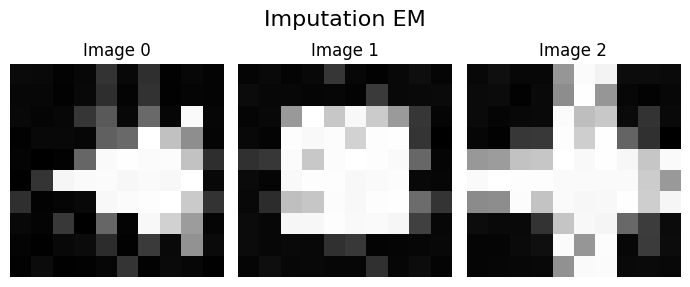

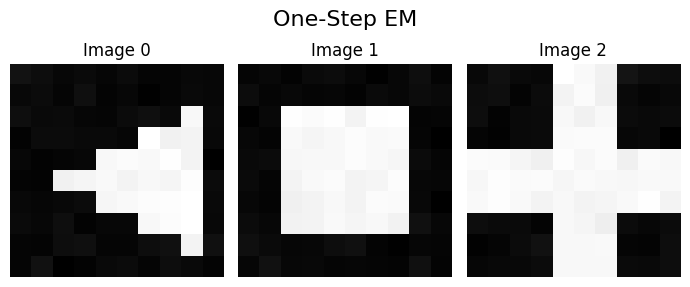

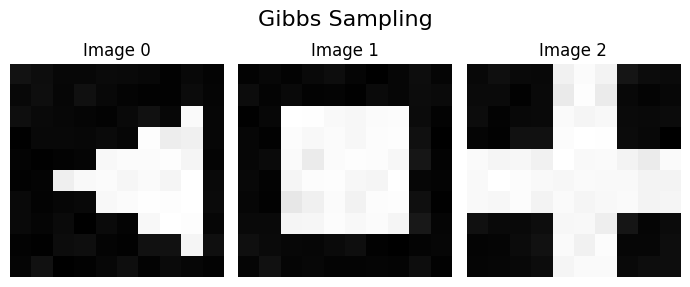

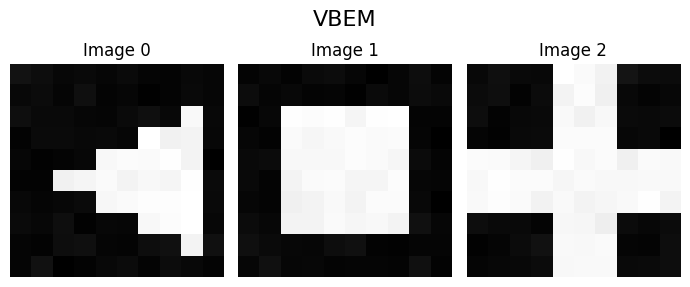

In [96]:
paint_shape(shape_em_cc_result60, "Complete Case EM")
paint_shape(shapes_em_impute_result60, "Imputation EM")
paint_shape(shape_em_result60, "One-Step EM")
paint_shape(shapes_gibbs_result60, "Gibbs Sampling")
paint_shape(shapes_vbem_result60, "VBEM")

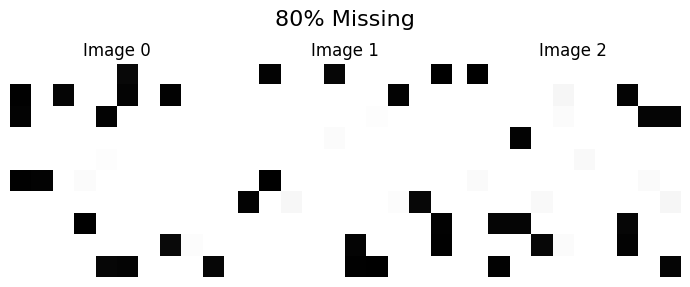

In [98]:
X_train_shapes_missing_80 = shape_dataset.apply_missingness(0.8)[0]
mean_shapes_missing_80 = shape_mean_dataset.apply_missingness(0.8)[0]
paint_shape(mean_shapes_missing_80, "80% Missing")

In [41]:

BMM_shape_prior = BMMPriorParameters(X_train_shapes, 3)
BMM_shape_em_cc80 = BMMEM(3, complete_case=True)
BMM_shape_em80 = BMMEM(3)
BMM_shape_em_impute80 = BMMEM(3)
BMM_shape_gibbs80 = BMMGibbs(BMM_shape_prior)
BMM_shape_vbem80 = BMMVBEM(BMM_shape_prior)


res0 = BMM_shape_em_cc80.fit(X_train_shapes_missing_80)
res1 = BMM_shape_em80.fit(X_train_shapes_missing_80)
res2 = BMM_shape_em_impute80.fit(mean_impute(X_train_shapes_missing_80))
res3 = BMM_shape_gibbs80.fit(X_train_shapes_missing_80)
res4 = BMM_shape_vbem80.fit(X_train_shapes_missing_80)

In [ ]:
shape_em_result80 = BMM_shape_em80.impute(mean_shapes_missing_80)
shape_em_cc_result80 = BMM_shape_em_cc80.impute(mean_shapes_missing_80)
shapes_em_impute_result80 = BMM_shape_em_impute80.impute(mean_shapes_missing_80)
shapes_gibbs_result80 = BMM_shape_gibbs80.impute(mean_shapes_missing_80)
shapes_vbem_result80 = BMM_shape_vbem80.impute(mean_shapes_missing_80)

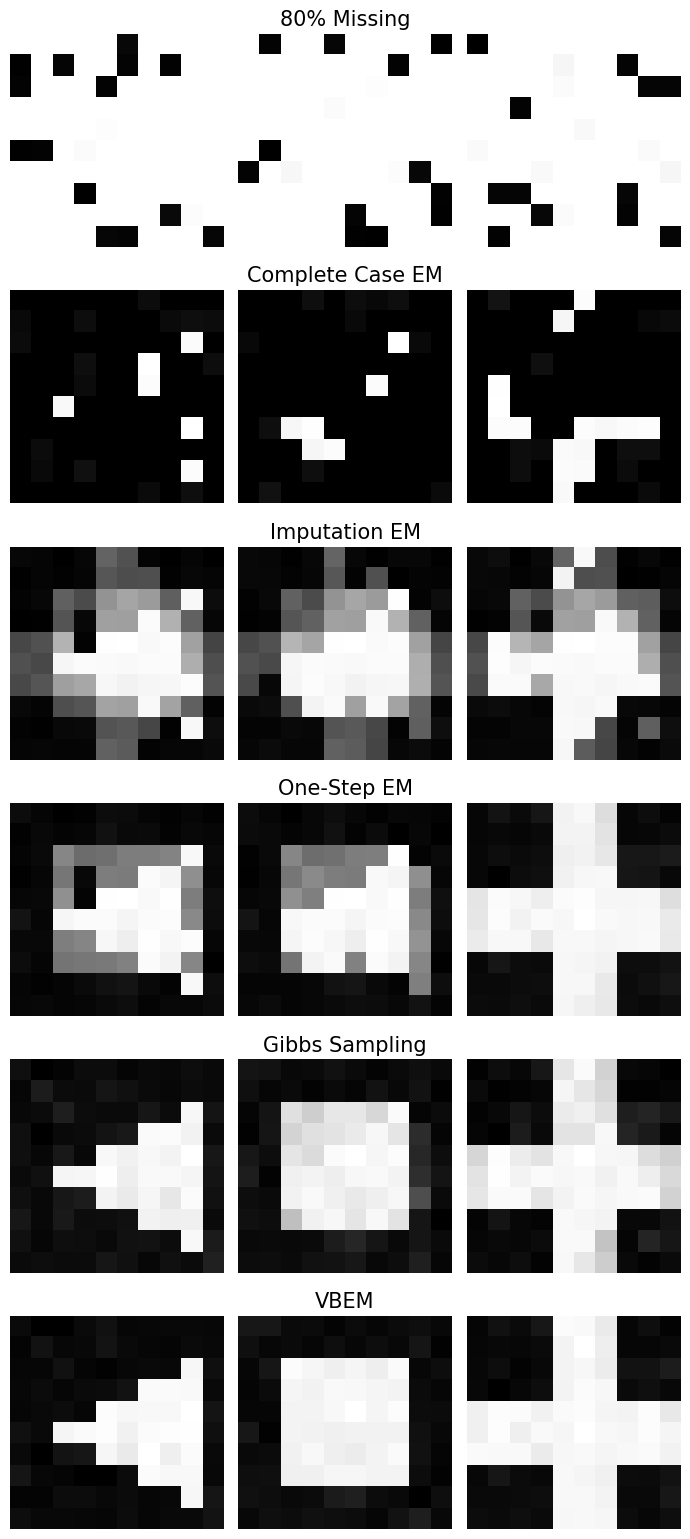

In [141]:
images_80 = [mean_shapes_missing_80, shape_em_cc_result80,shapes_em_impute_result80,shape_em_result80,shapes_gibbs_result80,shapes_vbem_result80]
titles_80 = ["80% Missing","Complete Case EM", "Imputation EM","One-Step EM","Gibbs Sampling","VBEM"]
paint_shapes(images_80, titles_80)

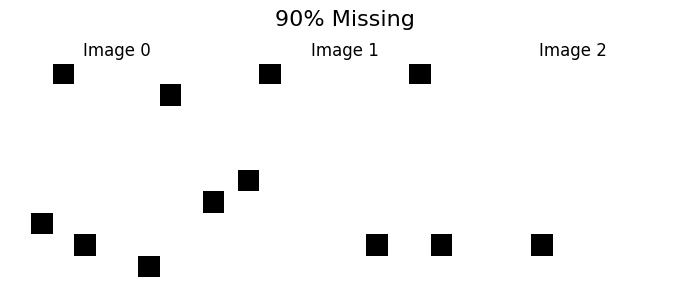

In [6]:
X_train_shapes_missing_90 = shape_dataset.apply_missingness(0.9)[0]
mean_shapes_missing_90 = shape_mean_dataset.apply_missingness(0.9)[0]
paint_shape(mean_shapes_missing_90, "90% Missing")

In [7]:
BMM_shape_prior = BMMPriorParameters(X_train_shapes, 3)
BMM_shape_em_cc90 = BMMEM(3, complete_case=True)
BMM_shape_em90 = BMMEM(3)
BMM_shape_em_impute90 = BMMEM(3)
BMM_shape_gibbs90 = BMMGibbs(BMM_shape_prior)
BMM_shape_vbem90 = BMMVBEM(BMM_shape_prior)


res0 = BMM_shape_em_cc90.fit(X_train_shapes_missing_90)
res1 = BMM_shape_em90.fit(X_train_shapes_missing_90)
res2 = BMM_shape_em_impute90.fit(mean_impute(X_train_shapes_missing_90))
res3 = BMM_shape_gibbs90.fit(X_train_shapes_missing_90)
res4 = BMM_shape_vbem90.fit(X_train_shapes_missing_90)

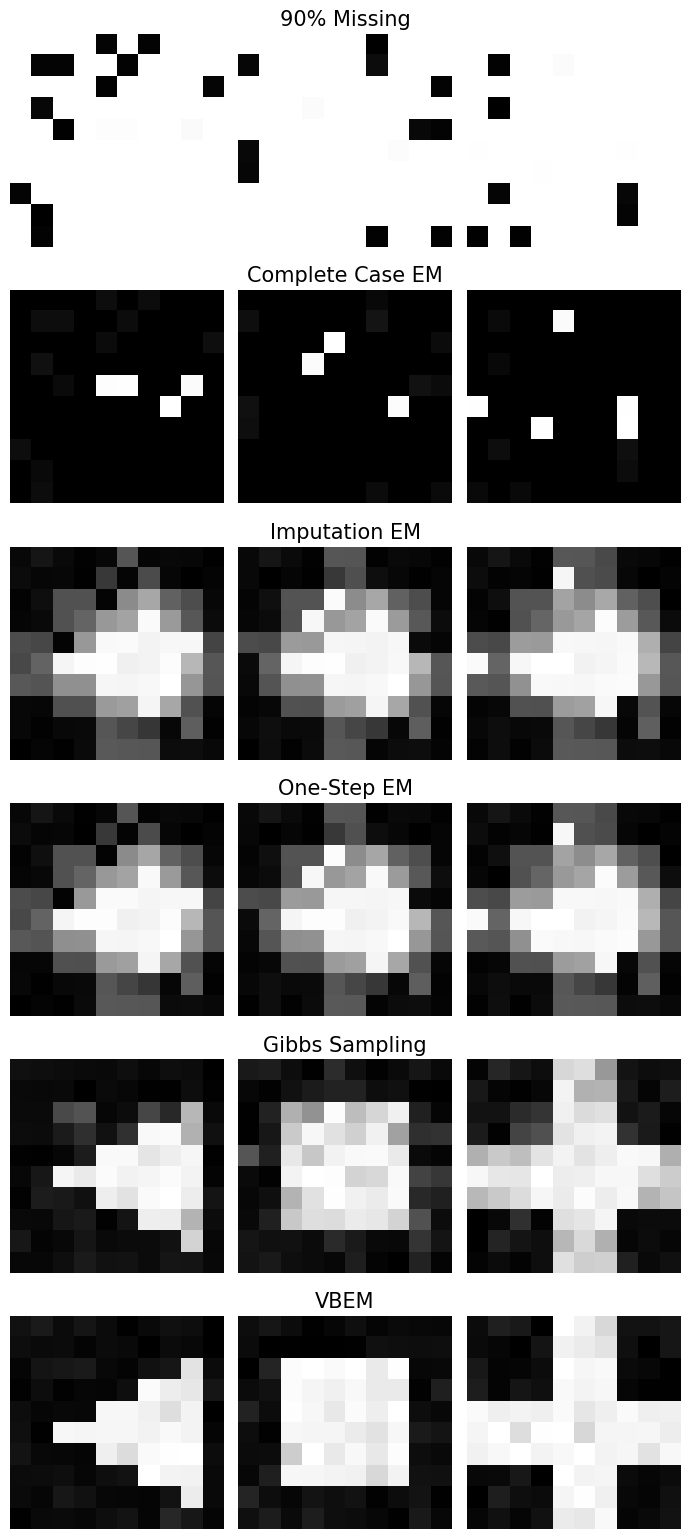

In [ ]:
shape_em_result90 = BMM_shape_em90.impute(mean_shapes_missing_90)
shape_em_cc_result90 = BMM_shape_em_cc90.impute(mean_shapes_missing_90)
shapes_em_impute_result90 = BMM_shape_em_impute90.impute(mean_shapes_missing_90)
shapes_gibbs_result90 = BMM_shape_gibbs90.impute(mean_shapes_missing_90)
shapes_vbem_result90 = BMM_shape_vbem90.impute(mean_shapes_missing_90)
images_90 = [mean_shapes_missing_90, shape_em_cc_result90,shapes_em_impute_result90,shape_em_result90,shapes_gibbs_result90,shapes_vbem_result90]
titles_90 = ["90% Missing","Complete Case EM", "Imputation EM","One-Step EM","Gibbs Sampling","VBEM"]
paint_shapes(images_90, titles_90)

---

In [4]:
def paint_digit(X, title):
    figure = plt.figure(figsize=(7, 7))
    rows, cols = 1, 5


    for k in range(5):
        img = np.round(X[k, :]).reshape(5, 5)
        ax = figure.add_subplot(rows, cols, k + 1)
        ax.set_title(f"Image {k}")
        ax.axis("off")
        ax.imshow(img, cmap="gray")

    plt.tight_layout()
    figure.suptitle(title, fontsize=16,y=0.73)
    plt.show()

In [5]:
import matplotlib.pyplot as plt

def paint_shapes(X, titles):
    figure, axes = plt.subplots(nrows=6, ncols=5, figsize=(7, 18))

    for i in range(6):       # rows (different methods)
        for k in range(5):   # cols (3 samples per method)
            img = X[i][k, :].reshape(5, 5)
            ax = axes[i, k]
            ax.imshow(img, cmap="gray")
            # ax.axis("off")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.tick_params(bottom=False, left=False)

            # Only label the center column with the method name
            if k == 2:
                ax.set_title(titles[i], fontsize=15)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, top=0.55)  # smaller value = less vertical space
    plt.show()


In [6]:
digits_dirpath = "./../Datasets/Gaussian/Processed/digits5x5/"

X_train_digits = np.load(digits_dirpath + "X_train_digits5x5.npy")
y_train_digits = np.load(digits_dirpath + "y_train_digits5x5.npy")
means_digits = np.load(digits_dirpath + "means_digits5x5.npy")
# pis_shapes = np.load(shapes_dirpath + "pis_s.npy")
digits_dataset = Dataset(X_train_digits, y_train_digits)
digits_mean_dataset = Dataset(means_digits, y_train_digits)

In [150]:
X_train_digits_missing_30 = digits_dataset.apply_missingness(0.3)[0]
mean_digits_missing_30 = digits_mean_dataset.apply_missingness(0.3)[0]

In [152]:

GMM_digits_prior = GMMPriorParameters(X_train_digits, 5)
GMM_digits_em_cc30 = GMMEM(5, complete_case=True)
GMM_digits_em30 = GMMEM(5)
GMM_digits_em_impute30 = GMMEM(5)
GMM_digits_gibbs30 = GMMGibbs(GMM_digits_prior)
GMM_digits_vbem30 = GMMVBEM(GMM_digits_prior)


res0 = GMM_digits_em_cc30.fit(X_train_digits_missing_30)
res1 = GMM_digits_em30.fit(X_train_digits_missing_30)
res2 = GMM_digits_em_impute30.fit(mean_impute(X_train_digits_missing_30))
res3 = GMM_digits_gibbs30.fit(X_train_digits_missing_30, num_iters=4000, burn=1000)
res4 = GMM_digits_vbem30.fit(X_train_digits_missing_30)

In [ ]:
digits_em_result30 = GMM_digits_em30.impute(mean_digits_missing_30)
digits_em_cc_result30 = GMM_digits_em_cc30.impute(mean_digits_missing_30)
digits_em_impute_result30 = GMM_digits_em_impute30.impute(mean_digits_missing_30)
digits_gibbs_result30 = GMM_digits_gibbs30.impute(mean_digits_missing_30)
digits_vbem_result30 = GMM_digits_vbem30.impute(mean_digits_missing_30)

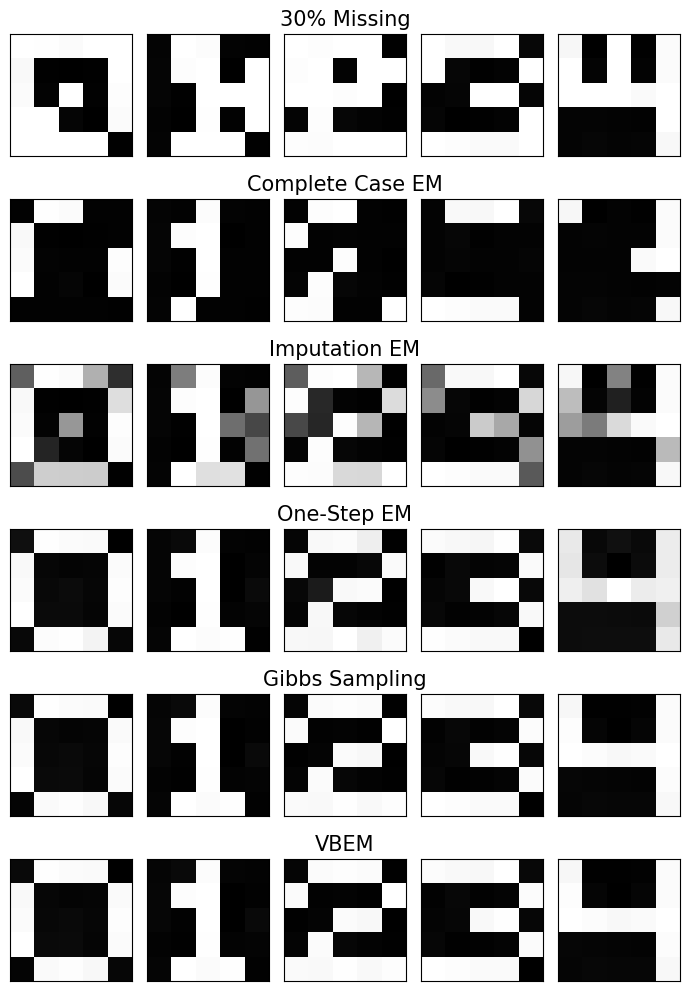

In [170]:
digit_images_30 = [mean_digits_missing_30, digits_em_cc_result30,digits_em_impute_result30,digits_em_result30,digits_vbem_result30,digits_vbem_result30]
digit_titles_30 = ["30% Missing","Complete Case EM", "Imputation EM","One-Step EM","Gibbs Sampling","VBEM"]
paint_shapes(digit_images_30, digit_titles_30)

In [7]:
X_train_digits_missing_80 = digits_dataset.apply_missingness(0.80)[0]
mean_digits_missing_80 = digits_mean_dataset.apply_missingness(0.80)[0]

In [8]:
GMM_digits_prior = GMMPriorParameters(X_train_digits, 5)
GMM_digits_em_cc80 = GMMEM(5, complete_case=True)
GMM_digits_em80 = GMMEM(5)
GMM_digits_em_impute80 = GMMEM(5)
GMM_digits_gibbs80 = GMMGibbs(GMM_digits_prior)
GMM_digits_vbem80 = GMMVBEM(GMM_digits_prior)


res0 = GMM_digits_em_cc80.fit(X_train_digits_missing_80)
res1 = GMM_digits_em80.fit(X_train_digits_missing_80)
res2 = GMM_digits_em_impute80.fit(mean_impute(X_train_digits_missing_80))
res3 = GMM_digits_gibbs80.fit(X_train_digits_missing_80, num_iters=4000, burn=1000)
res4 = GMM_digits_vbem80.fit(X_train_digits_missing_80)

In [10]:
digits_em_result80 = GMM_digits_em80.impute(mean_digits_missing_80)
digits_em_cc_result80 = GMM_digits_em_cc80.impute(mean_digits_missing_80)
digits_em_impute_result80 = GMM_digits_em_impute80.impute(mean_digits_missing_80)
digits_gibbs_result80 = GMM_digits_gibbs80.impute(mean_digits_missing_80)
digits_vbem_result80 = GMM_digits_vbem80.impute(mean_digits_missing_80)

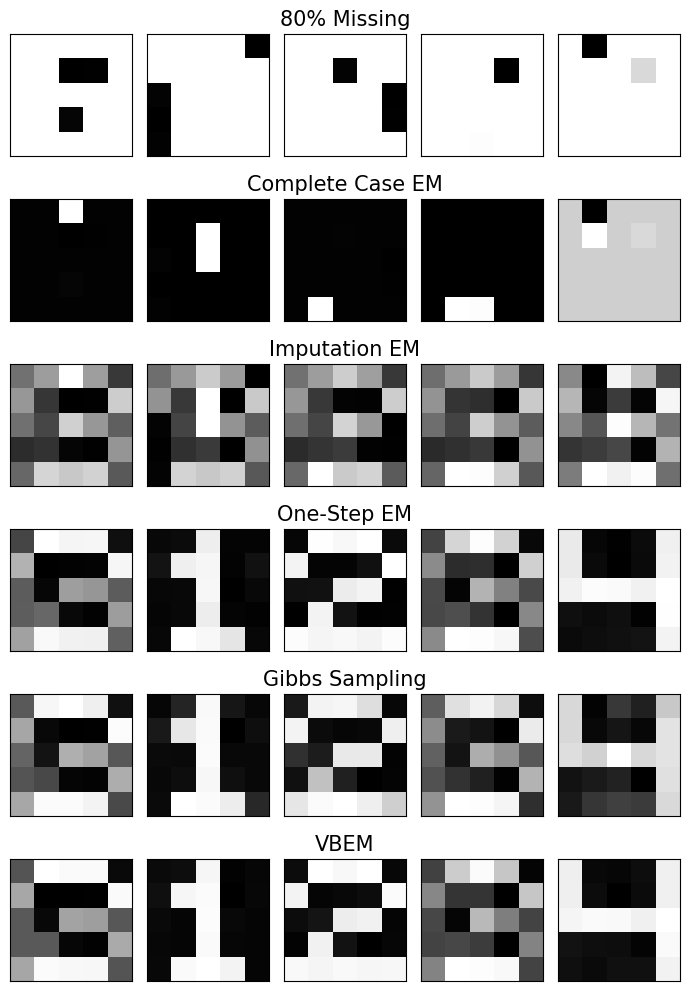

In [12]:
digit_images_80 = [mean_digits_missing_80, digits_em_cc_result80,digits_em_impute_result80,digits_em_result80,digits_gibbs_result80,digits_vbem_result80]
digit_titles_80 = ["80% Missing","Complete Case EM", "Imputation EM","One-Step EM","Gibbs Sampling","VBEM"]
paint_shapes(digit_images_80, digit_titles_80)